In [25]:
# setup dataframe with nVidia stock prices over 5 years
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

df = pd.read_csv('NVDA_5Y.csv', index_col='Date', parse_dates=True)
index = range(1,len(df))

<IPython.core.display.Javascript object>


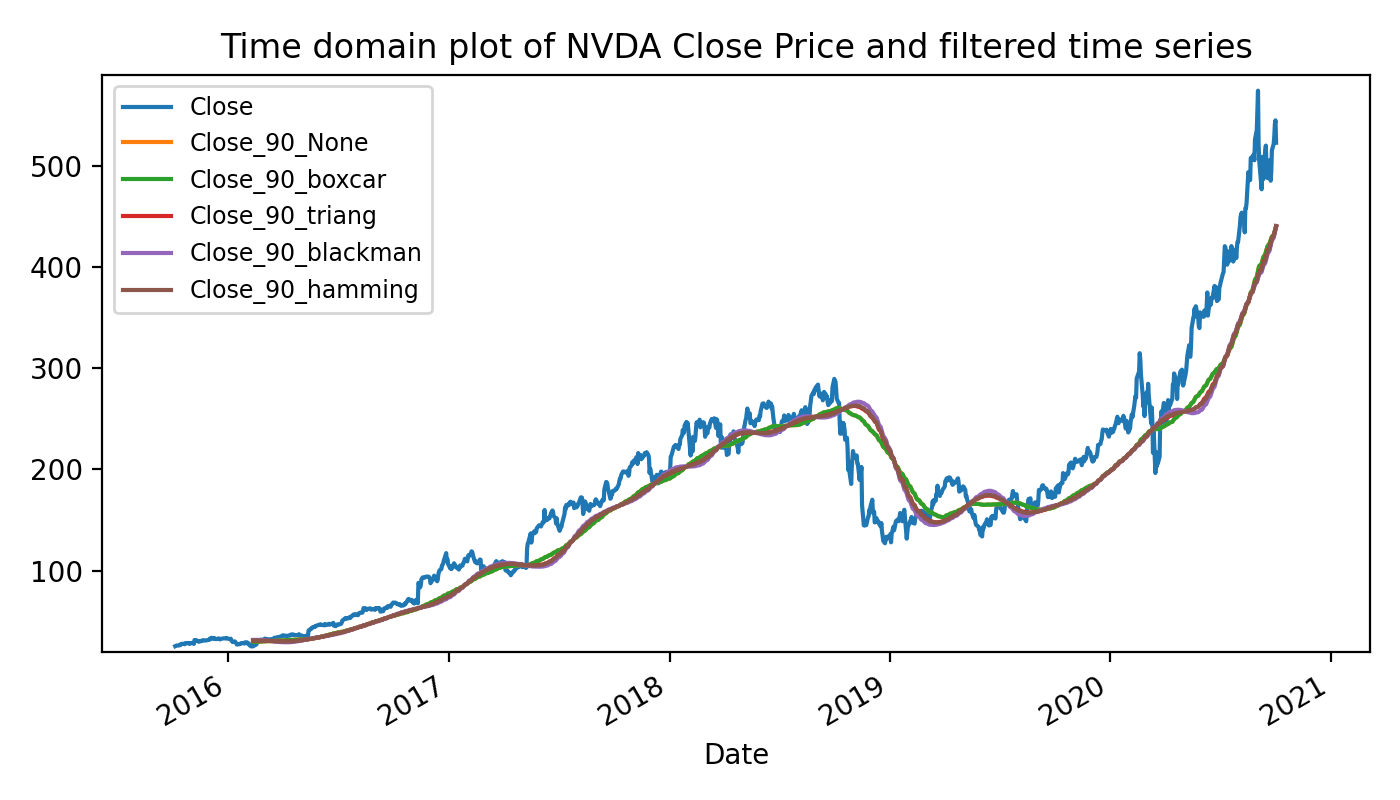

In [26]:
# plot different filters

win_len = 90
win_type = [None, 'boxcar', 'triang', 'blackman', 'hamming']

ax = df['Close'].plot(figsize=(7,4), title='Time domain plot of NVDA Close Price and filtered time series')

for win in win_type:
    df_roll = df.rolling(win_len, win_type=win).mean()
    df_roll.columns = [
        '{}_{}_{}'.format(col, win_len, win) for col in df_roll.columns
    ]
    df_roll['Close_{}_{}'.format(win_len, win)].plot()
    
ax.legend(fontsize=8.5)
plt.tight_layout()
plt.show()


In [27]:
# build trend following and boxcar filter columns

win_len = 365

# trend calculates percent change over 365 days
df['trend'] = ''
for k in index:
    df['trend'].values[k] = (df['Close'].values[k] / df['Close'].values[k-win_len] - 1) * 100

win_len = 90
# boxcar is a moving avg over 90 days in USD
df['filt_boxcar'] = df.Close.rolling(win_len, win_type='boxcar').mean()

# hamming filter
df['filt_hamm'] = df.Close.rolling(win_len, win_type='hamming').mean()

df.replace('', np.nan, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,trend,filt_boxcar,filt_hamm
Date,,,,,,,,,
2015-10-05,24.959999,25.730000,24.830000,25.420000,24.785362,12050600,NaN,NaN,NaN
2015-10-06,25.150000,25.860001,25.049999,25.750000,25.107115,11330400,-85.541018,NaN,NaN
2015-10-07,25.809999,26.280001,25.389999,26.020000,25.370377,7753800,-85.490437,NaN,NaN
2015-10-08,25.910000,26.240000,25.469999,26.170000,25.516632,11501700,-85.541436,NaN,NaN
2015-10-09,26.030001,26.280001,25.580000,26.070000,25.419125,10581200,-85.554386,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-09-28,521.609985,522.070007,510.000000,521.400024,521.400024,14345200,178.391822,431.506446,430.210071
2020-09-29,517.500000,537.710022,517.330017,529.030029,529.030029,15536500,183.966731,433.484446,432.723265
2020-09-30,526.299988,544.900024,526.010010,541.219971,541.219971,17206100,187.165049,435.486335,435.243274


<IPython.core.display.Javascript object>


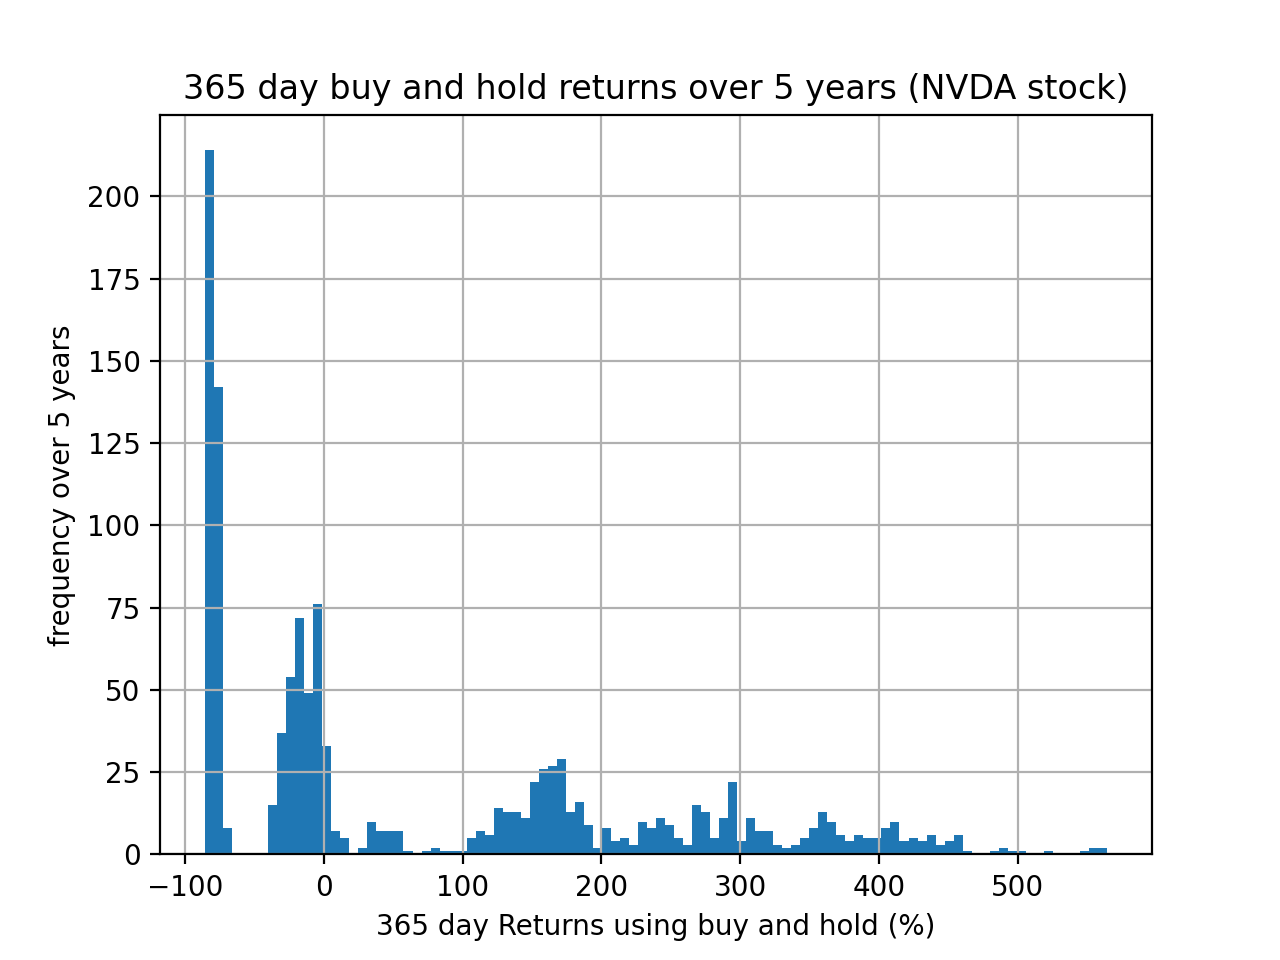

<AxesSubplot:title={'center':'365 day buy and hold returns over 5 years (NVDA stock)'}, xlabel='365 day Returns using buy and hold (%)', ylabel='frequency over 5 years'>

In [28]:
# histogram of returns
# basic buy and hold
hist_trend = plt.hist(df['trend'],bins=100)

plt.figure();
plt.title('365 day buy and hold returns over 5 years (NVDA stock)')
plt.xlabel('365 day Returns using buy and hold (%)')
plt.ylabel('frequency over 5 years')
df['trend'].hist(bins=100)


In [29]:
# buy/hold based on trend

Hold = 0
df['trend_account'] = ''

for k in index:
    price = df['Close'].values[k]
    fprice = df['trend'].values[k]
    
    if (price > fprice):
        if (Hold == 0):
            df['trend_account'].values[k] = price
        else:
            gain = df['Close'].values[k] / df['Close'].values[k-1]
            df['trend_account'].values[k] = df['trend_account'].values[k-1] * gain
    elif (price < fprice):
        if (price > Hold):
            Hold = price
        df['trend_account'].values[k] = Hold
        
df.replace('', np.nan, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,trend,filt_boxcar,filt_hamm,trend_account
Date,,,,,,,,,,
2015-10-05,24.959999,25.730000,24.830000,25.420000,24.785362,12050600,NaN,NaN,NaN,NaN
2015-10-06,25.150000,25.860001,25.049999,25.750000,25.107115,11330400,-85.541018,NaN,NaN,25.750000
2015-10-07,25.809999,26.280001,25.389999,26.020000,25.370377,7753800,-85.490437,NaN,NaN,26.020000
2015-10-08,25.910000,26.240000,25.469999,26.170000,25.516632,11501700,-85.541436,NaN,NaN,26.170000
2015-10-09,26.030001,26.280001,25.580000,26.070000,25.419125,10581200,-85.554386,NaN,NaN,26.070000
...,...,...,...,...,...,...,...,...,...,...
2020-09-28,521.609985,522.070007,510.000000,521.400024,521.400024,14345200,178.391822,431.506446,430.210071,579.878676
2020-09-29,517.500000,537.710022,517.330017,529.030029,529.030029,15536500,183.966731,433.484446,432.723265,588.364439
2020-09-30,526.299988,544.900024,526.010010,541.219971,541.219971,17206100,187.165049,435.486335,435.243274,601.921568


In [30]:
# buy/hold based on boxcar filter

Hold = 0
df['box_account'] = ''

for k in index:
    price = df['Close'].values[k]
    fprice = df['filt_boxcar'].values[k]
    
    if (price > fprice):
        if (Hold == 0):
            df['box_account'].values[k] = price
        else:
            gain = df['Close'].values[k] / df['Close'].values[k-1]
            df['box_account'].values[k] = df['box_account'].values[k-1] * gain
    elif (price < fprice):
        if (price > Hold):
            Hold = price
        df['box_account'].values[k] = Hold
        
df.replace('', np.nan, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,trend,filt_boxcar,filt_hamm,trend_account,box_account
Date,,,,,,,,,,,
2015-10-05,24.959999,25.730000,24.830000,25.420000,24.785362,12050600,NaN,NaN,NaN,NaN,NaN
2015-10-06,25.150000,25.860001,25.049999,25.750000,25.107115,11330400,-85.541018,NaN,NaN,25.750000,NaN
2015-10-07,25.809999,26.280001,25.389999,26.020000,25.370377,7753800,-85.490437,NaN,NaN,26.020000,NaN
2015-10-08,25.910000,26.240000,25.469999,26.170000,25.516632,11501700,-85.541436,NaN,NaN,26.170000,NaN
2015-10-09,26.030001,26.280001,25.580000,26.070000,25.419125,10581200,-85.554386,NaN,NaN,26.070000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,521.609985,522.070007,510.000000,521.400024,521.400024,14345200,178.391822,431.506446,430.210071,579.878676,529.801065
2020-09-29,517.500000,537.710022,517.330017,529.030029,529.030029,15536500,183.966731,433.484446,432.723265,588.364439,537.554008
2020-09-30,526.299988,544.900024,526.010010,541.219971,541.219971,17206100,187.165049,435.486335,435.243274,601.921568,549.940360


In [31]:
# buy/hold based on hamming filter

Hold = 0
df['hamm_account'] = ''

for k in index:
    price = df['Close'].values[k]
    fprice = df['filt_hamm'].values[k]
    
    if (price > fprice):
        if (Hold == 0):
            df['hamm_account'].values[k] = price
        else:
            gain = df['Close'].values[k] / df['Close'].values[k-1]
            df['hamm_account'].values[k] = df['hamm_account'].values[k-1] * gain
    elif (price < fprice):
        if (price > Hold):
            Hold = price
        df['hamm_account'].values[k] = Hold
        
df.replace('', np.nan, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,trend,filt_boxcar,filt_hamm,trend_account,box_account,hamm_account
Date,,,,,,,,,,,,
2015-10-05,24.959999,25.730000,24.830000,25.420000,24.785362,12050600,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-06,25.150000,25.860001,25.049999,25.750000,25.107115,11330400,-85.541018,NaN,NaN,25.750000,NaN,NaN
2015-10-07,25.809999,26.280001,25.389999,26.020000,25.370377,7753800,-85.490437,NaN,NaN,26.020000,NaN,NaN
2015-10-08,25.910000,26.240000,25.469999,26.170000,25.516632,11501700,-85.541436,NaN,NaN,26.170000,NaN,NaN
2015-10-09,26.030001,26.280001,25.580000,26.070000,25.419125,10581200,-85.554386,NaN,NaN,26.070000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,521.609985,522.070007,510.000000,521.400024,521.400024,14345200,178.391822,431.506446,430.210071,579.878676,529.801065,529.801065
2020-09-29,517.500000,537.710022,517.330017,529.030029,529.030029,15536500,183.966731,433.484446,432.723265,588.364439,537.554008,537.554008
2020-09-30,526.299988,544.900024,526.010010,541.219971,541.219971,17206100,187.165049,435.486335,435.243274,601.921568,549.940360,549.940360


<IPython.core.display.Javascript object>


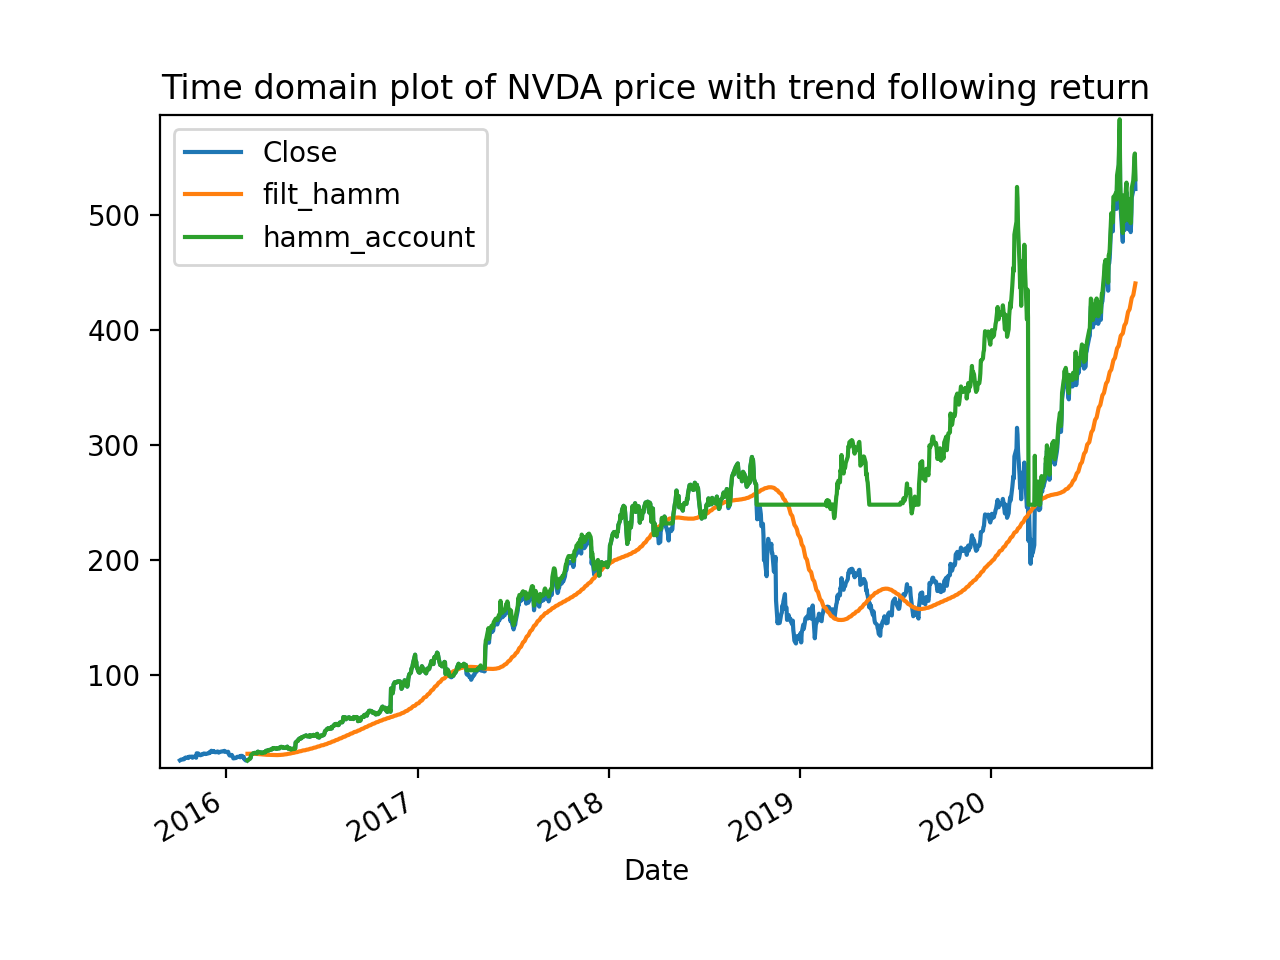

In [32]:
# compare trend to box
fig = plt.figure()
plt.title('Time domain plot of NVDA price with trend following return')
ax = df['Close'].plot()
#bx = df['filt_boxcar'].plot()
#cx = df['trend_account'].plot()
#dx = df['box_account'].plot()
ex = df['filt_hamm'].plot()
fx = df['hamm_account'].plot()
plt.legend()

In [33]:
# calculate returns for filtered trend following:
# boxcar
win_len = 365
#df['box_returns'] = ''
box_returns = [None] * len(df)
hamm_returns = [None] * len(df)
for j in index:
    box_returns[j] = (df['box_account'].values[j] / df['box_account'].values[j-win_len] - 1) * 100
    
# hamming
#df['hamm_returns'] = ''
for m in index:
    hamm_returns[m] = (df['hamm_account'].values[m] / df['hamm_account'].values[m-win_len] - 1) * 100

df

,Open,High,Low,Close,Adj Close,Volume,trend,filt_boxcar,filt_hamm,trend_account,box_account,hamm_account
Date,,,,,,,,,,,,
2015-10-05,24.959999,25.730000,24.830000,25.420000,24.785362,12050600,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-06,25.150000,25.860001,25.049999,25.750000,25.107115,11330400,-85.541018,NaN,NaN,25.750000,NaN,NaN
2015-10-07,25.809999,26.280001,25.389999,26.020000,25.370377,7753800,-85.490437,NaN,NaN,26.020000,NaN,NaN
2015-10-08,25.910000,26.240000,25.469999,26.170000,25.516632,11501700,-85.541436,NaN,NaN,26.170000,NaN,NaN
2015-10-09,26.030001,26.280001,25.580000,26.070000,25.419125,10581200,-85.554386,NaN,NaN,26.070000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,521.609985,522.070007,510.000000,521.400024,521.400024,14345200,178.391822,431.506446,430.210071,579.878676,529.801065,529.801065
2020-09-29,517.500000,537.710022,517.330017,529.030029,529.030029,15536500,183.966731,433.484446,432.723265,588.364439,537.554008,537.554008
2020-09-30,526.299988,544.900024,526.010010,541.219971,541.219971,17206100,187.165049,435.486335,435.243274,601.921568,549.940360,549.940360


<IPython.core.display.Javascript object>


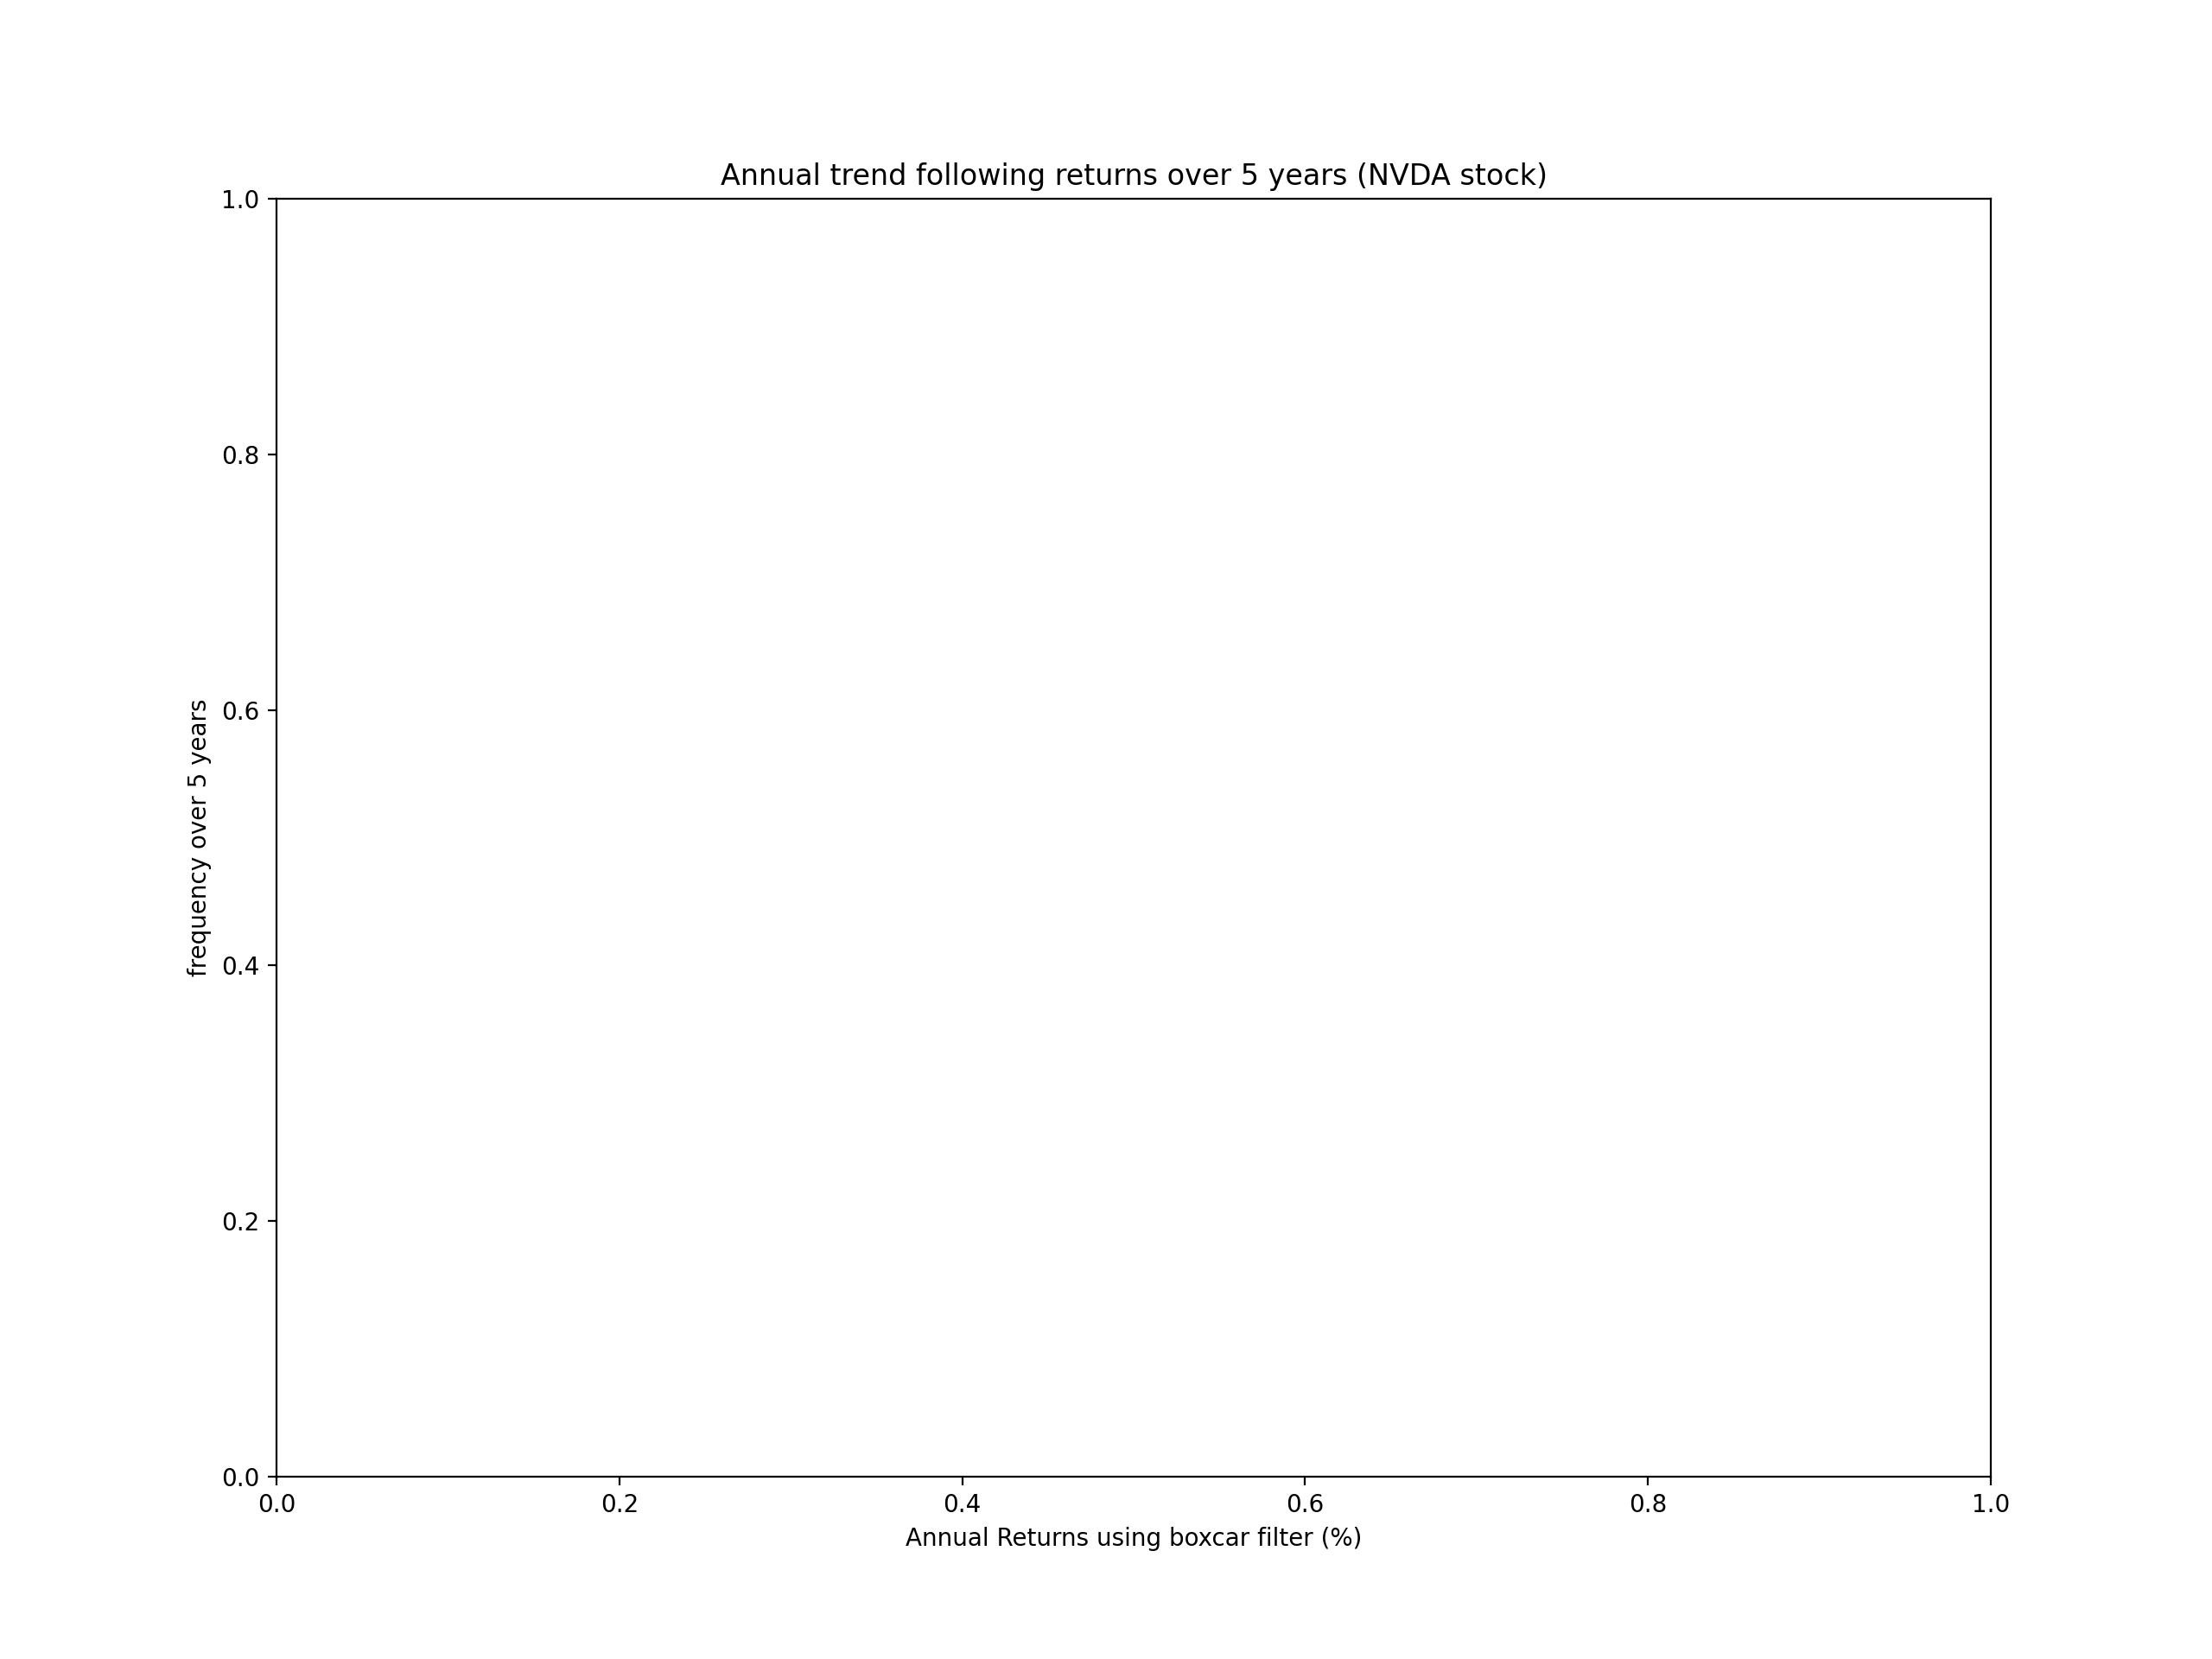

In [34]:
# histogram of returns
# boxcar
hist_trend = plt.hist(box_returns,bins=200)

plt.figure();
plt.title('Annual trend following returns over 5 years (NVDA stock)')
plt.xlabel('Annual Returns using boxcar filter (%)')
plt.ylabel('frequency over 5 years')
plt.show()